In [1]:
# ======================================================
# CLASSIFICATION TASK 0: Upload + Load Dataset (Google Colab)
# File: zomato_reviews.csv
# ======================================================

import pandas as pd
from google.colab import files

uploaded = files.upload()  # Upload zomato_reviews.csv

df = pd.read_csv("zomato_reviews.csv")

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


Saving zomato_reviews.csv to zomato_reviews.csv
Shape: (20000, 5)
Columns: ['review_id', 'rating', 'review_text', 'review_date', 'helpful']


,review_id,rating,review_text,review_date,helpful
0,90749778-cd88-4c19-8b12-1fce7e7d82f8,4,kindly requesting to return change . we are fo...,2025-11-27 08:15:26,0
1,aa848bb6-d242-4a7e-831e-4f21e2e60c6e,1,"Hiked prices, packing and platform charges",2025-11-27 08:08:31,0
2,4f888388-9f28-44a4-8601-491a87035e53,5,good discount,2025-11-27 04:20:28,0
3,490a16b3-aacf-4204-bdcb-ffdbf04add72,1,"Zomato in its initial days was too good, but c...",2025-11-27 03:34:38,0
4,0090a503-13b8-4741-a7c0-42e811244563,5,good application,2025-11-27 02:50:58,0


INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    20000 non-null  object
 1   rating       20000 non-null  int64 
 2   review_text  20000 non-null  object
 3   review_date  20000 non-null  object
 4   helpful      20000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 781.4+ KB

MISSING VALUES:
review_id      0
rating         0
review_text    0
review_date    0
helpful        0
dtype: int64

RATING DISTRIBUTION (ORIGINAL):
rating
1     5068
2      406
3      666
4     2770
5    11090
Name: count, dtype: int64

BINARY TARGET DISTRIBUTION (sentiment):
sentiment
1    13860
0     5474
Name: count, dtype: int64

TEXT LENGTH SUMMARY:
count    19334.000000
mean        81.247750
std        105.334592
min          3.000000
25%         20.000000
50%         38.000000
75%         91.000000
max        500.000000
Name: text_len

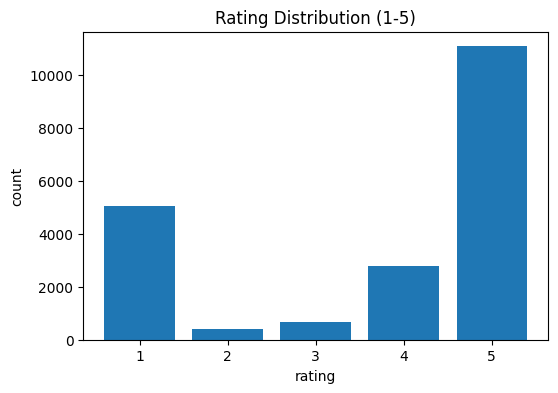

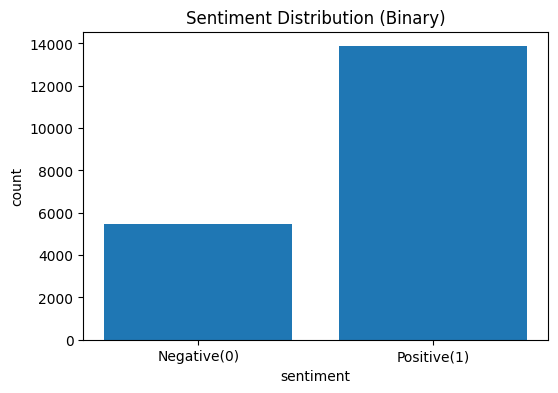


Example Questions this dataset can answer:
1) Can we predict sentiment (positive/negative) from review text?
2) Do longer reviews tend to be more negative or positive?
3) Which words are most associated with positive vs negative sentiment?

CLASSIFICATION TASK 1 COMPLETED


In [2]:
# ======================================================
# CLASSIFICATION TASK 1: EDA + Data Understanding
# Target: Binary sentiment from rating
# Negative: rating 1-2, Positive: rating 4-5, Drop rating 3
# ======================================================

import numpy as np
import matplotlib.pyplot as plt

print("INFO:")
df.info()

print("\nMISSING VALUES:")
print(df.isna().sum())

print("\nRATING DISTRIBUTION (ORIGINAL):")
print(df["rating"].value_counts().sort_index())

# ---- Create Binary Target ----
df1 = df.copy()
df1 = df1[df1["rating"].isin([1,2,4,5])].copy()
df1["sentiment"] = df1["rating"].map({1:0, 2:0, 4:1, 5:1}).astype(int)

print("\nBINARY TARGET DISTRIBUTION (sentiment):")
print(df1["sentiment"].value_counts())

# ---- Add simple text length feature ----
df1["text_len"] = df1["review_text"].fillna("").astype(str).str.len()

print("\nTEXT LENGTH SUMMARY:")
print(df1["text_len"].describe())

# ---- Plot rating distribution ----
plt.figure(figsize=(6,4))
plt.bar(df["rating"].value_counts().sort_index().index, df["rating"].value_counts().sort_index().values)
plt.title("Rating Distribution (1-5)")
plt.xlabel("rating")
plt.ylabel("count")
plt.show()

# ---- Plot sentiment distribution ----
plt.figure(figsize=(6,4))
plt.bar(["Negative(0)", "Positive(1)"], df1["sentiment"].value_counts().sort_index().values)
plt.title("Sentiment Distribution (Binary)")
plt.xlabel("sentiment")
plt.ylabel("count")
plt.show()

# ---- Example questions (for your report) ----
print("\nExample Questions this dataset can answer:")
print("1) Can we predict sentiment (positive/negative) from review text?")
print("2) Do longer reviews tend to be more negative or positive?")
print("3) Which words are most associated with positive vs negative sentiment?")

print("\nCLASSIFICATION TASK 1 COMPLETED")


In [3]:
# ======================================================
# CLASSIFICATION TASK 2: Neural Network Classifier (MLPClassifier)
# Lecture 11: neurons + activation + gradient-based learning
# ======================================================

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix

X = df1["review_text"].fillna("").astype(str)
y = df1["sentiment"].astype(int)

# ---- Train/Test split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

mlp_clf = Pipeline(steps=[
    ("tfidf", TfidfVectorizer(
        stop_words="english",
        max_features=20000,
        ngram_range=(1,2),
        min_df=2
    )),
    ("mlp", MLPClassifier(
        hidden_layer_sizes=(128, 64),
        activation="relu",
        solver="adam",
        alpha=1e-4,
        learning_rate_init=1e-3,
        max_iter=30,
        random_state=42,
        early_stopping=True,
        n_iter_no_change=5
    ))
])

mlp_clf.fit(X_train, y_train)
pred = mlp_clf.predict(X_test)

acc = accuracy_score(y_test, pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, pred, average="binary")

print("MLP Results:")
print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1-score :", f1)

print("\nClassification Report:\n", classification_report(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))

print("CLASSIFICATION TASK 2 COMPLETED")


MLP Results:
Accuracy : 0.9420739591414533
Precision: 0.9602601156069365
Recall   : 0.9588744588744589
F1-score : 0.9595667870036101

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1095
           1       0.96      0.96      0.96      2772

    accuracy                           0.94      3867
   macro avg       0.93      0.93      0.93      3867
weighted avg       0.94      0.94      0.94      3867

Confusion Matrix:
 [[ 985  110]
 [ 114 2658]]
CLASSIFICATION TASK 2 COMPLETED


In [4]:
# ======================================================
# CLASSIFICATION TASK 3: Two Classical Models
# Lecture 6: Logistic Regression
# Lecture 10: Naive Bayes for Text
# ======================================================

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

def eval_clf(name, model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    acc = accuracy_score(y_test, pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, pred, average="binary")

    print(f"\n{name}")
    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1-score :", f1)
    return {"Model": name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1}

# Logistic Regression pipeline
logreg = Pipeline(steps=[
    ("tfidf", TfidfVectorizer(stop_words="english", max_features=20000, ngram_range=(1,2), min_df=2)),
    ("clf", LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42))
])

# Naive Bayes pipeline
nb = Pipeline(steps=[
    ("tfidf", TfidfVectorizer(stop_words="english", max_features=20000, ngram_range=(1,2), min_df=2)),
    ("clf", MultinomialNB())
])

res1 = eval_clf("Logistic Regression", logreg)
res2 = eval_clf("Naive Bayes", nb)

import pandas as pd
task3_table = pd.DataFrame([res1, res2]).sort_values("F1", ascending=False)
display(task3_table)

print("CLASSIFICATION TASK 3 COMPLETED")



Logistic Regression
Accuracy : 0.9281096457201965
Precision: 0.973424449506454
Recall   : 0.924963924963925
F1-score : 0.9485756566777654

Naive Bayes
Accuracy : 0.9340574088440652
Precision: 0.9451715599575522
Recall   : 0.963924963924964
F1-score : 0.9544561528844436


,Model,Accuracy,Precision,Recall,F1
1,Naive Bayes,0.934057,0.945172,0.963925,0.954456
0,Logistic Regression,0.928110,0.973424,0.924964,0.948576


CLASSIFICATION TASK 3 COMPLETED


In [5]:
# ======================================================
# CLASSIFICATION TASK 4: Hyperparameter Tuning + Cross-Validation
# Using GridSearchCV
# ======================================================

from sklearn.model_selection import GridSearchCV, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ---- Tune Logistic Regression ----
logreg_pipe = Pipeline(steps=[
    ("tfidf", TfidfVectorizer(stop_words="english")),
    ("clf", LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42))
])

logreg_params = {
    "tfidf__max_features": [10000, 20000],
    "tfidf__ngram_range": [(1,1), (1,2)],
    "tfidf__min_df": [1, 2],
    "clf__C": [0.5, 1, 2, 5]
}

logreg_grid = GridSearchCV(
    logreg_pipe,
    param_grid=logreg_params,
    scoring="f1",
    cv=cv,
    n_jobs=-1
)

logreg_grid.fit(X_train, y_train)
print("Best LogReg params:", logreg_grid.best_params_)
print("Best LogReg CV F1:", logreg_grid.best_score_)

# ---- Tune Naive Bayes ----
nb_pipe = Pipeline(steps=[
    ("tfidf", TfidfVectorizer(stop_words="english")),
    ("clf", MultinomialNB())
])

nb_params = {
    "tfidf__max_features": [10000, 20000],
    "tfidf__ngram_range": [(1,1), (1,2)],
    "tfidf__min_df": [1, 2],
    "clf__alpha": [0.1, 0.5, 1.0]
}

nb_grid = GridSearchCV(
    nb_pipe,
    param_grid=nb_params,
    scoring="f1",
    cv=cv,
    n_jobs=-1
)

nb_grid.fit(X_train, y_train)
print("\nBest NB params:", nb_grid.best_params_)
print("Best NB CV F1:", nb_grid.best_score_)

print("CLASSIFICATION TASK 4 COMPLETED")


Best LogReg params: {'clf__C': 5, 'tfidf__max_features': 10000, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2)}
Best LogReg CV F1: 0.9540530717975996

Best NB params: {'clf__alpha': 0.5, 'tfidf__max_features': 10000, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2)}
Best NB CV F1: 0.9557895302421271
CLASSIFICATION TASK 4 COMPLETED


In [6]:
# ======================================================
# CLASSIFICATION TASK 5: Feature Selection (Filter Method - chi2)
# Week-10 style: SelectKBest
# ======================================================

from sklearn.feature_selection import SelectKBest, chi2

# Logistic Regression with feature selection
logreg_fs = Pipeline(steps=[
    ("tfidf", TfidfVectorizer(stop_words="english", **{k.replace("tfidf__",""):v for k,v in logreg_grid.best_params_.items() if k.startswith("tfidf__")})),
    ("select", SelectKBest(score_func=chi2, k=8000)),
    ("clf", LogisticRegression(
        max_iter=2000,
        class_weight="balanced",
        random_state=42,
        C=logreg_grid.best_params_["clf__C"]
    ))
])

logreg_fs.fit(X_train, y_train)
pred_lr = logreg_fs.predict(X_test)

acc_lr = accuracy_score(y_test, pred_lr)
prec_lr, rec_lr, f1_lr, _ = precision_recall_fscore_support(y_test, pred_lr, average="binary")

print("LogReg + Feature Selection")
print("Accuracy :", acc_lr)
print("Precision:", prec_lr)
print("Recall   :", rec_lr)
print("F1-score :", f1_lr)

# NB with feature selection
nb_fs = Pipeline(steps=[
    ("tfidf", TfidfVectorizer(stop_words="english", **{k.replace("tfidf__",""):v for k,v in nb_grid.best_params_.items() if k.startswith("tfidf__")})),
    ("select", SelectKBest(score_func=chi2, k=8000)),
    ("clf", MultinomialNB(alpha=nb_grid.best_params_["clf__alpha"]))
])

nb_fs.fit(X_train, y_train)
pred_nb = nb_fs.predict(X_test)

acc_nb = accuracy_score(y_test, pred_nb)
prec_nb, rec_nb, f1_nb, _ = precision_recall_fscore_support(y_test, pred_nb, average="binary")

print("\nNB + Feature Selection")
print("Accuracy :", acc_nb)
print("Precision:", prec_nb)
print("Recall   :", rec_nb)
print("F1-score :", f1_nb)

print("CLASSIFICATION TASK 5 COMPLETED")


LogReg + Feature Selection
Accuracy : 0.9322472200672356
Precision: 0.9682835820895522
Recall   : 0.9361471861471862
F1-score : 0.9519442406456347

NB + Feature Selection
Accuracy : 0.934833204034135
Precision: 0.9585152838427947
Recall   : 0.9502164502164502
F1-score : 0.9543478260869566
CLASSIFICATION TASK 5 COMPLETED


In [7]:
# ======================================================
# CLASSIFICATION TASK 6: Final Models + Comparison Table
# Includes CV F1 and Test Metrics
# ======================================================

from sklearn.model_selection import cross_val_score
import pandas as pd

final_models = {
    "Logistic Regression (Tuned + FS)": logreg_fs,
    "Naive Bayes (Tuned + FS)": nb_fs
}

rows = []
for name, model in final_models.items():
    cv_f1 = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1", n_jobs=-1).mean()
    pred = model.predict(X_test)

    acc = accuracy_score(y_test, pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, pred, average="binary")

    rows.append({
        "Model": name,
        "CV F1": cv_f1,
        "Test Accuracy": acc,
        "Test Precision": prec,
        "Test Recall": rec,
        "Test F1": f1
    })

final_table = pd.DataFrame(rows).sort_values("Test F1", ascending=False)
display(final_table)

print("CLASSIFICATION TASK 6 COMPLETED")


,Model,CV F1,Test Accuracy,Test Precision,Test Recall,Test F1
1,Naive Bayes (Tuned + FS),0.956372,0.934833,0.958515,0.950216,0.954348
0,Logistic Regression (Tuned + FS),0.953167,0.932247,0.968284,0.936147,0.951944


CLASSIFICATION TASK 6 COMPLETED


In [8]:
# ======================================================
# CLASSIFICATION TASK 7: Report Quality Checklist (for your PDF)
# ======================================================

print("""
REPORT CHECKLIST:
- Dataset background (source, access method, why chosen, UNSDG link)
- Explain target creation: binary sentiment (1-2 negative, 4-5 positive, drop 3)
- EDA: rating distribution, sentiment imbalance, text length
- Model descriptions:
  * Naive Bayes (Bayes rule + independence assumption)
  * Logistic Regression (sigmoid + decision boundary)
  * MLP (layers, activation, optimizer, early stopping)
- Evaluation:
  * Accuracy, Precision, Recall, F1
  * Confusion matrix
  * Cross-validation + hyperparameter tuning results
  * Feature selection method and why
- Final comparison table
""")
print("CLASSIFICATION TASK 7 COMPLETED")



REPORT CHECKLIST:
- Dataset background (source, access method, why chosen, UNSDG link)
- Explain target creation: binary sentiment (1-2 negative, 4-5 positive, drop 3)
- EDA: rating distribution, sentiment imbalance, text length
- Model descriptions:
  * Naive Bayes (Bayes rule + independence assumption)
  * Logistic Regression (sigmoid + decision boundary)
  * MLP (layers, activation, optimizer, early stopping)
- Evaluation:
  * Accuracy, Precision, Recall, F1
  * Confusion matrix
  * Cross-validation + hyperparameter tuning results
  * Feature selection method and why
- Final comparison table

CLASSIFICATION TASK 7 COMPLETED


In [9]:
# ======================================================
# CLASSIFICATION TASK 8: Conclusion + Reflection Prompts
# ======================================================

print("""
CONCLUSION/REFLECTION IDEAS:
- Which model performed best and why (interpret from F1 + CV F1)
- How hyperparameter tuning improved results (compare Task 3 vs Task 4/6)
- How feature selection affected performance and speed
- Common error types seen in confusion matrix (false positives/negatives)
- Limitations:
  * dropping rating=3 removes neutral class
  * dataset imbalance
  * short reviews may lack signal
- Future work:
  * use 3-class sentiment
  * try character n-grams
  * try stronger neural network / more epochs
""")
print("CLASSIFICATION TASK 8 COMPLETED")



CONCLUSION/REFLECTION IDEAS:
- Which model performed best and why (interpret from F1 + CV F1)
- How hyperparameter tuning improved results (compare Task 3 vs Task 4/6)
- How feature selection affected performance and speed
- Common error types seen in confusion matrix (false positives/negatives)
- Limitations:
  * dropping rating=3 removes neutral class
  * dataset imbalance
  * short reviews may lack signal
- Future work:
  * use 3-class sentiment
  * try character n-grams
  * try stronger neural network / more epochs

CLASSIFICATION TASK 8 COMPLETED
